<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Sun Oct 16 13:29:51 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P8    12W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [15]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

1.12.1+cu113


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

1. Self-driving cars, such as Tesla using computer vision to percieve what's happening on the road. See Tesla AI day for more - https://youtu.be/j0z4FweCy4M
2. Healthcare imaging, such as using computer vision to help interpret X-rays. Google also uses computer vision for detecting polyps in the intenstines - https://ai.googleblog.com/2021/08/improved-detection-of-elusive-polyps.html
3. Security, computer vision can be used to detect whether someone is invading your home or not - https://store.google.com/au/product/nest_cam_battery?hl=en-GB

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

Overfitting is like memorizing for a test but then you can't answer a question that's slightly different.

In other words, if a model is overfitting, it's learning the training data *too well* and these patterns don't generalize to unseen data.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

See this article for some ideas: https://elitedatascience.com/overfitting-in-machine-learning 

3 ways to prevent overfitting:
1. **Regularization techniques** - You could use [dropout on your neural networks](https://en.wikipedia.org/wiki/Dilution_(neural_networks)), dropout involves randomly removing neurons in different layers so that the remaining neurons hopefully learn more robust weights/patterns.
2. **Use a different model** - maybe the model you're using for a specific problem is too complicated, as in, it's learning the data too well because it has so many layers. You could remove some layers to simplify your model. Or you could pick a totally different model altogether, one that may be more suited to your particular problem. Or... you could also use [transfer learning](https://en.wikipedia.org/wiki/Transfer_learning) (taking the patterns from one model and applying them to your own problem). 
3. **Reduce noise in data/cleanup dataset/introduce data augmentation techniques** - If the model is learning the data too well, it might be just memorizing the data, including the noise. One option would be to remove the noise/clean up the dataset or if this doesn't, you can introduce artificial noise through the use of data augmentation to artificially increase the diversity of your training dataset.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [5]:
import torchvision
from torchvision import datasets
from torchvision import transforms

# Get the MNIST train dataset 
train_data = datasets.MNIST(
    root=".",
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

# Get the MNIST test dataset
test_data = datasets.MNIST(
    root=".",
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

train_data, test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: .
     Split: Train
     StandardTransform
 Transform: ToTensor(), Dataset MNIST
     Number of datapoints: 10000
     Root location: .
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [ ]:
img = train_data[0][0]
label = train_data[0][1]
print(f"Image: {img}")
print(f"Label: {label}")

In [8]:
# Get the class names from the dataset
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

## 6. Visualize at least 5 different samples of the MNIST training dataset.

torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


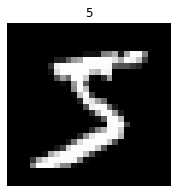

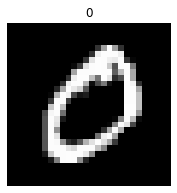

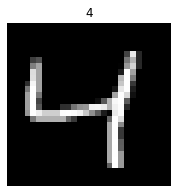

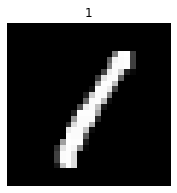

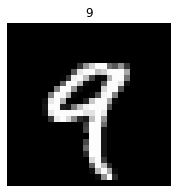

In [9]:
import matplotlib.pyplot as plt

for i in range(5):
    img = train_data[i][0]
    print(img.shape)
    img_squeeze = img.squeeze()
    print(img_squeeze.shape)
    
    label = train_data[i][1]
    plt.figure(figsize=(3, 3))
    plt.imshow(img_squeeze, cmap="gray")
    plt.title(label)
    plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [10]:
# Create train dataloader
from torch.utils.data import DataLoader

train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=32,
    shuffle=True
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=32,
    shuffle=False
)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f1609038610>,
 <torch.utils.data.dataloader.DataLoader at 0x7f1609038b50>)

In [11]:
for sample in next(iter(train_dataloader)):
    print(sample.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


In [12]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [22]:
from torch import nn

class MNIST_model(torch.nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(
                in_features=hidden_units * 7 * 7,
                out_features=output_shape
            )
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        # print(f"Output shape of conv block 1: {x.shape}")
        x = self.conv_block_2(x)
        # print(f"Output shape of conv block 2: {x.shape}")
        x = self.classifier(x)
        # print(f"Output shape of classifier: {x.shape}")
        return x

In [24]:
device

'cuda'

In [23]:
model = MNIST_model(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)
).to(device)
model

MNIST_model(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
# Check out the model state dict to find out what patterns our model wants to learn
model.state_dict()

In [28]:
# Try a dummy forward pass to see what shapes our data is
dummy_x = torch.rand(size=(1, 28, 28)).unsqueeze(dim=0).to(device)
print(dummy_x.shape)
model(dummy_x)

torch.Size([1, 1, 28, 28])


tensor([[ 0.0069,  0.0592,  0.0052,  0.0197, -0.0418, -0.0203, -0.0096, -0.0476,
          0.0384,  0.0198]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [29]:
dummy_x_2 = torch.rand(size=(1, 10, 7, 7))
dummy_x_2.shape

torch.Size([1, 10, 7, 7])

In [31]:
flatten_layer = nn.Flatten()
flatten_layer(dummy_x_2).shape

torch.Size([1, 490])

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [32]:
from tqdm.auto import tqdm

# Train on CPU
model_cpu = MNIST_model(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)
).to("cpu")

# Create a loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_cpu.parameters(), lr=0.1)

### Training loop
epochs = 5
for epoch in tqdm(range(epochs)):
    train_loss = 0
    for bacth, (X, y) in enumerate(train_dataloader):
        model_cpu.train()

        # Put data on CPU
        X, y = X.to("cpu"), y.to("cpu")

        # Forward pass
        y_pred = model_cpu(X)

        # Loss calculation
        loss = loss_fn(y_pred, y)
        train_loss += loss

        # Optimizer zero grad
        optimizer.zero_grad()

        # Loss backward
        loss.backward()

        # Step the optimizer
        optimizer.step()

    # Adjust train loss for number of batches
    train_loss /= len(train_dataloader)

    ### Testing loop
    test_loss_total = 0

    # Put model in eval mode 
    model_cpu.eval()

    # Turn on inference mode
    with torch.inference_mode():
        for batch, (X_test, y_test) in enumerate(test_dataloader):
            # Make sure test data on CPU
            X_test, y_test = X_test.to("cpu"), y_test.to("cpu")
            test_pred = model_cpu(X_test)
            test_loss = loss_fn(test_pred, y_test)

            test_loss_total += test_loss

        test_loss_total /= len(test_dataloader)

    # Print out what's happening
    print(f"Epoch: {epoch} | Loss: {train_loss:.3f} | Test loss: {test_loss_total:.3f}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Loss: 0.309 | Test loss: 0.081
Epoch: 1 | Loss: 0.078 | Test loss: 0.056
Epoch: 2 | Loss: 0.057 | Test loss: 0.045
Epoch: 3 | Loss: 0.048 | Test loss: 0.042
Epoch: 4 | Loss: 0.042 | Test loss: 0.039


In [33]:
from tqdm.auto import tqdm

# Train on GPU
model_gpu = MNIST_model(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)
).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_gpu.parameters(), lr=0.1)

epochs = 5
for epoch in tqdm(range(epochs)):
    train_loss = 0
    model_cpu.train()
    for bacth, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)
        y_pred = model_gpu(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss /= len(train_dataloader)
    test_loss_total = 0
    model_gpu.eval()

    with torch.inference_mode():
        for batch, (X_test, y_test) in enumerate(test_dataloader):
            X_test, y_test = X_test.to(device), y_test.to(device)
            test_pred = model_gpu(X_test)
            test_loss = loss_fn(test_pred, y_test)

            test_loss_total += test_loss

        test_loss_total /= len(test_dataloader)

    # Print out what's happening
    print(f"Epoch: {epoch} | Loss: {train_loss:.3f} | Test loss: {test_loss_total:.3f}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Loss: 0.228 | Test loss: 0.082
Epoch: 1 | Loss: 0.066 | Test loss: 0.054
Epoch: 2 | Loss: 0.053 | Test loss: 0.041
Epoch: 3 | Loss: 0.044 | Test loss: 0.043
Epoch: 4 | Loss: 0.040 | Test loss: 0.043


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

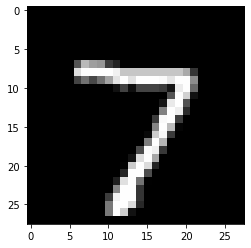

In [34]:
# Make predictions with the trained model
plt.imshow(test_data[0][0].squeeze(), cmap="gray")

In [35]:
# Logits -> Prediction probabilities -> Prediction labels
model_pred_logits = model_gpu(test_data[0][0].unsqueeze(dim=0).to(device))
model_pred_probs = torch.softmax(model_pred_logits, dim=1)
model_pred_label = torch.argmax(model_pred_probs, dim=1)
model_pred_label

tensor([7], device='cuda:0')

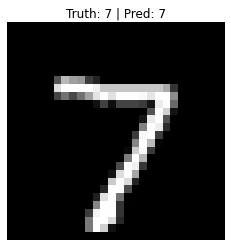

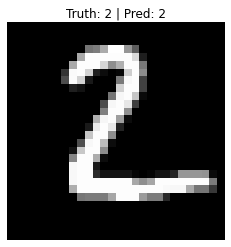

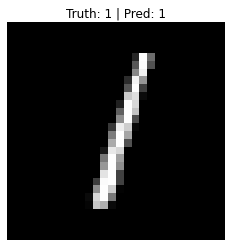

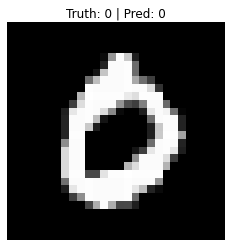

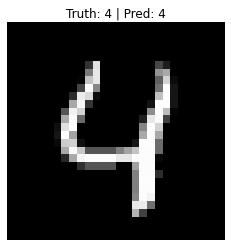

In [36]:
num_to_plot = 5
for i in range(num_to_plot):
    # Get image and labels from the test data
    img = test_data[i][0]
    label = test_data[i][1]

    # Make prediction on image
    model_pred_logits = model_gpu(img.unsqueeze(dim=0).to(device))
    model_pred_probs = torch.softmax(model_pred_logits, dim=1)
    model_pred_label = torch.argmax(model_pred_probs, dim=1)

    # Plot the image and prediction
    plt.figure()
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(f"Truth: {label} | Pred: {model_pred_label.cpu().item()}")
    plt.axis(False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [37]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

     |████████████████████████████████| 529 kB 34.1 MB/s 
     |████████████████████████████████| 1.3 MB 45.2 MB/s 
mlxtend version: 0.21.0


In [38]:
# Import mlxtend upgraded version
import mlxtend

print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19

0.21.0


In [39]:
# Make predictions across all test data
from tqdm.auto import tqdm

model_gpu.eval()
y_preds = []
with torch.inference_mode():
    for batch, (X, y) in tqdm(enumerate(test_dataloader)):
        X, y = X.to(device), y.to(device)
        y_pred_logits = model_gpu(X)
        y_pred_labels = torch.argmax(torch.softmax(y_pred_logits, dim=1), dim=1)
        y_preds.append(y_pred_labels)
    
    y_preds = torch.cat(y_preds).cpu()

len(y_preds)

0it [00:00, ?it/s]

10000

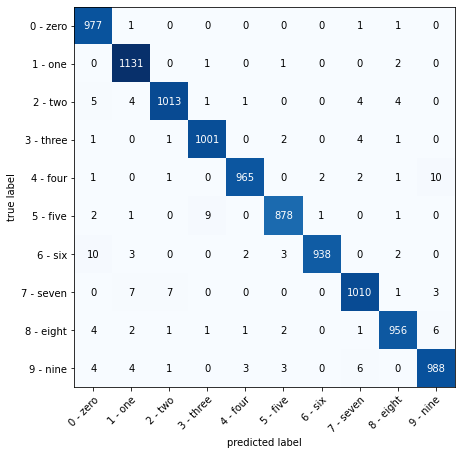

In [42]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix 
confmat = ConfusionMatrix(num_classes=len(class_names))
confmat_tesnsor = confmat(
    preds=y_preds,
    target=test_data.targets
)

# Plot the confusion matrix
fix, ax = plot_confusion_matrix(
    conf_mat=confmat_tesnsor.numpy(),
    class_names=class_names,
    figsize=(10,7)
)

In [40]:
test_data.targets[:10], y_preds[:10]

(tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]),
 tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]))

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [43]:
random_tensor = torch.rand(1, 3, 64, 64)
random_tensor.shape

torch.Size([1, 3, 64, 64])

In [56]:
conv_layer = nn.Conv2d(
    in_channels=3,
    out_channels=64,
    kernel_size=3,
    stride=2,
    padding=1
)

print(f"Random tensor original shape: {random_tensor.shape}")
random_tensor_through_conv_layer = conv_layer(random_tensor)
print(f"Random tensor through conv layer shape: {random_tensor_through_conv_layer.shape}")

Random tensor original shape: torch.Size([1, 3, 64, 64])
Random tensor through conv layer shape: torch.Size([1, 64, 32, 32])


## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [61]:
from torchvision.transforms.transforms import ToTensor
# Download FashionMNIST train & test
from torchvision import datasets
from torchvision import transforms

fashion_mnist_train = datasets.FashionMNIST(
    root=".",
    download=True,
    train=True,
    transform=transforms.ToTensor()
)

fashion_mnist_test = datasets.FashionMNIST(
    root=".",
    download=True,
    train=False,
    transform=transforms.ToTensor()
)

len(fashion_mnist_train), len(fashion_mnist_test)

(60000, 10000)

In [62]:
# Get the class names of the Fashion MNIST dataset
fashion_mnist_class_names = fashion_mnist_train.classes
fashion_mnist_class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [64]:
# Turn FashionMNIST datasets into dataloaders
from torch.utils.data import DataLoader

fashion_mnist_train_dataloader = DataLoader(
    fashion_mnist_train,
    batch_size=32,
    shuffle=True
)

fashion_mnist_test_dataloader = DataLoader(
    fashion_mnist_test,
    batch_size=32,
    shuffle=False
)

len(fashion_mnist_train_dataloader), len(fashion_mnist_test_dataloader)

(1875, 313)

In [65]:
# model_2 is the same architecture as MNIST_model
model_2 = MNIST_model(
    input_shape=1,
    hidden_units=10,
    output_shape=10
).to(device)
model_2

MNIST_model(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [67]:
# Setup loss and optimizer
from torch import nn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.01)

In [71]:
# Setup metrics
from tqdm import tqdm
from torchmetrics import Accuracy

acc_fn = Accuracy(
    num_classes=len(fashion_mnist_class_names)
).to(device)

# Setup training/testing loop
epochs = 5
for epoch in tqdm(range(epochs)):
    train_loss, test_loss_total = 0, 0
    train_acc, test_acc = 0, 0

    ### Training
    model_2.train()
    for batch, (X_train, y_train) in enumerate(fashion_mnist_train_dataloader):
        X_train, y_train = X_train.to(device), y_train.to(device)

        # Forward pass and loss
        y_pred = model_2(X_train)
        loss = loss_fn(y_pred, y_train)
        train_loss += loss
        train_acc += acc_fn(y_pred, y_train)

        # Backprop and gradient descent
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # Adjust the loss/acc (find the loss/acc per epoch)
    train_loss /= len(fashion_mnist_train_dataloader)
    train_acc /= len(fashion_mnist_train_dataloader)

    ### Testing
    model_2.eval()
    with torch.inference_mode():
        for batch, (X_test, y_test) in enumerate(fashion_mnist_test_dataloader):
            X_test, y_test = X_test.to(device), y_test.to(device)

            # Forward pass and loss
            y_pred_test = model_2(X_test)
            test_loss = loss_fn(y_pred_test, y_test)
            test_loss_total += test_loss

            test_acc += acc_fn(y_pred_test, y_test)

        # Adjust the loss/acc (find the loss/acc per epoch)
        test_loss /= len(fashion_mnist_test_dataloader)
        test_acc /= len(fashion_mnist_test_dataloader)

    # Print out what's happening
    print(f"Epoch: {epoch} | Train loss: {train_loss:.3f} | Train acc: {train_acc:.4f} | Test loss: {test_loss_total:.3f} | Test acc: {test_acc:.4f}")


 20%|██        | 1/5 [00:13<00:52, 13.00s/it]

Epoch: 0 | Train loss: 0.305 | Train acc: 0.8906 | Test loss: 111.315 | Test acc: 0.8757


 40%|████      | 2/5 [00:30<00:47, 15.92s/it]

Epoch: 1 | Train loss: 0.297 | Train acc: 0.8923 | Test loss: 99.637 | Test acc: 0.8867


 60%|██████    | 3/5 [00:48<00:33, 16.61s/it]

Epoch: 2 | Train loss: 0.290 | Train acc: 0.8962 | Test loss: 97.595 | Test acc: 0.8880


 80%|████████  | 4/5 [01:05<00:16, 16.92s/it]

Epoch: 3 | Train loss: 0.285 | Train acc: 0.8984 | Test loss: 95.311 | Test acc: 0.8944


100%|██████████| 5/5 [01:28<00:00, 17.63s/it]

Epoch: 4 | Train loss: 0.279 | Train acc: 0.9002 | Test loss: 94.608 | Test acc: 0.8930


In [70]:
# Make predictions with trained model_2
test_preds = []
model_2.eval()
with torch.inference_mode():
    for X_test, y_test in tqdm(fashion_mnist_test_dataloader):
        y_logits = model_2(X_test.to(device))
        y_pred_probs = torch.softmax(y_logits, dim=1)
        y_pred_labels = torch.argmax(y_pred_probs, dim=1)
        test_preds.append(y_pred_labels)

test_preds = torch.cat(test_preds).cpu()
test_preds[:10], len(test_preds)

100%|██████████| 313/313 [00:01<00:00, 309.91it/s]


(tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]), 10000)

In [74]:
# Get wrong prediction indexes
import numpy as np

wrong_pred_indexes = np.where(test_preds != fashion_mnist_test.targets)[0]
len(wrong_pred_indexes)

1349

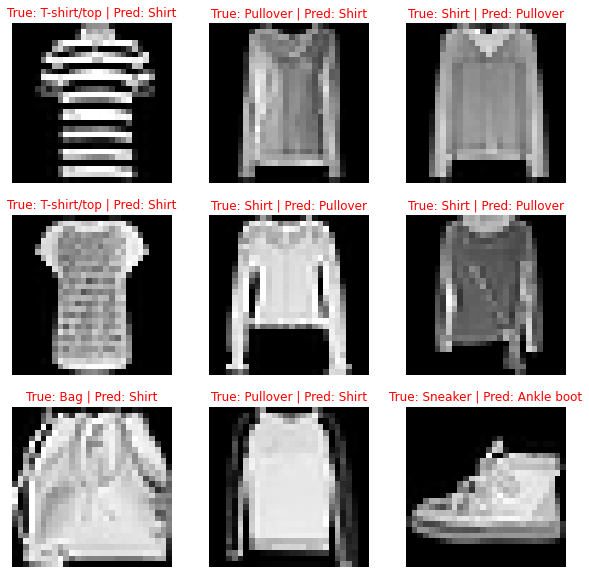

In [77]:
# Select random 9 wrong predictions and plot them
import random

random_selection = random.sample(list(wrong_pred_indexes), k=9)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_selection):
    # Get true and pred labels
    true_label = fashion_mnist_class_names[fashion_mnist_test[idx][1]]
    pred_label = fashion_mnist_class_names[test_preds[idx]]

    # Plot the wrong prediction with its original label
    plt.subplot(3, 3, i + 1)
    plt.imshow(fashion_mnist_test[idx][0].squeeze(), cmap="gray")
    plt.title(f"True: {true_label} | Pred: {pred_label}", c="r")
    plt.axis(False)